In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')

<Axes: >

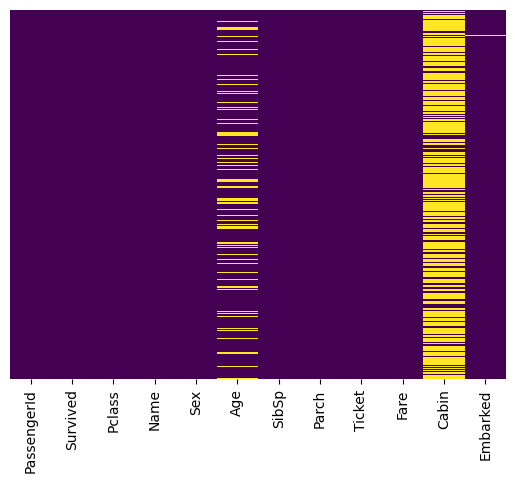

In [5]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [6]:
sns.set_style('darkgrid')

<Axes: xlabel='Survived', ylabel='count'>

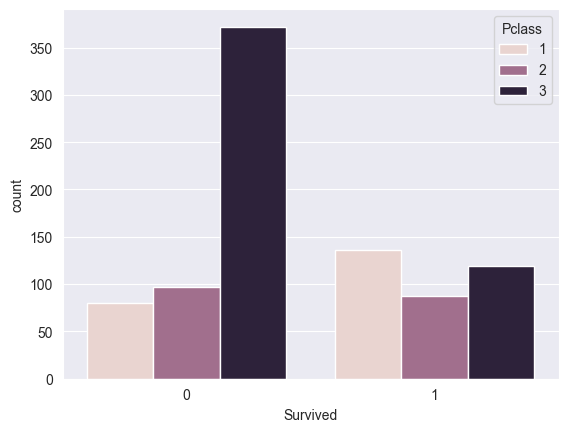

In [10]:
sns.countplot(x ='Survived', data = titanic_train, hue='Pclass')

c:\Users\Nihar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


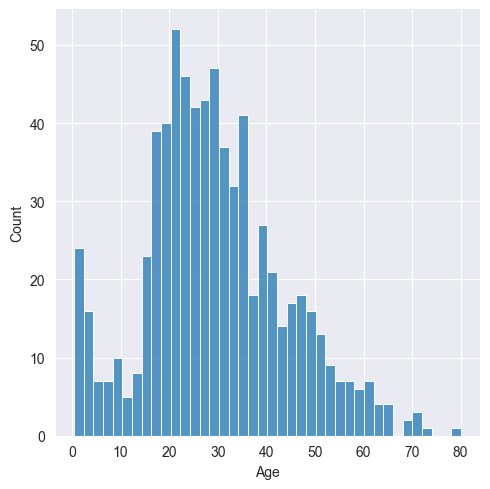

In [12]:
sns.displot(titanic_train['Age'].dropna(), bins = 40)

<Axes: xlabel='SibSp', ylabel='count'>

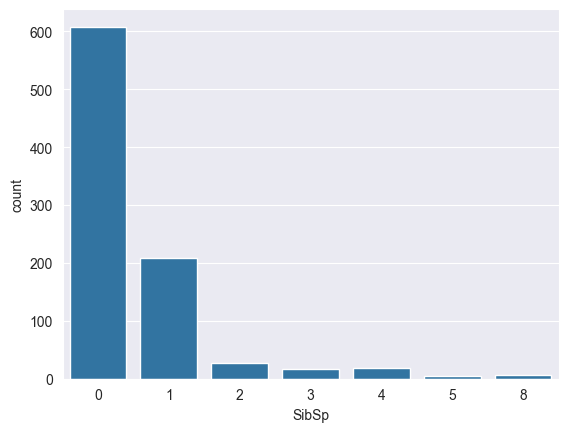

In [13]:
sns.countplot(x='SibSp', data = titanic_train)

<Axes: >

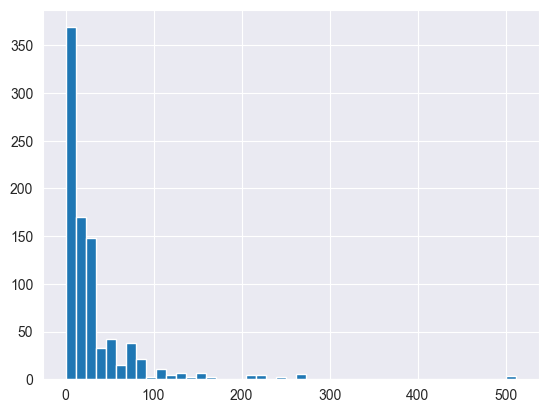

In [14]:
titanic_train['Fare'].hist(bins=45)

In [16]:
import cufflinks as cf
cf.go_offline()

In [17]:
titanic_train['Fare'].iplot(kind = 'hist', bins = 45)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(impute_age, axis = 1)

C:\Users\Nihar\AppData\Local\Temp\ipykernel_11504\1334420608.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Nihar\AppData\Local\Temp\ipykernel_11504\1334420608.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

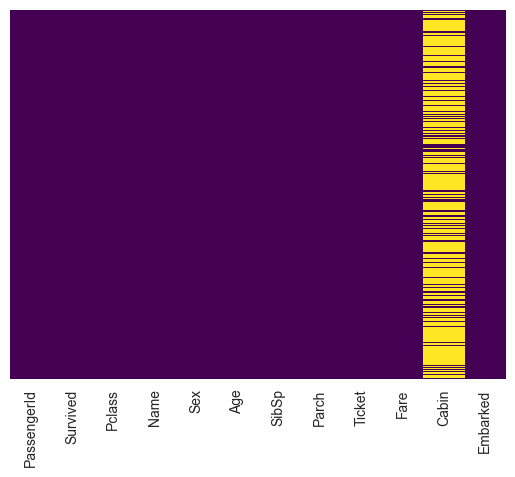

In [20]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [22]:
titanic_train.drop('Cabin', axis = 1, inplace = True)

In [25]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first= True)

In [26]:
embarked = pd.get_dummies(titanic_train['Embarked'], drop_first= True)

In [27]:
titanic_train = pd.concat([titanic_train, sex, embarked], axis = 1)

In [30]:
titanic_train.drop(['PassengerId'], axis =1, inplace= True)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = titanic_train.drop('Survived', axis = 1)
y = titanic_train['Survived']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [37]:
lr.fit(x_train, y_train)

c:\Users\Nihar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [39]:
predictions = lr.predict(x_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       187
           1       0.79      0.77      0.78       125

    accuracy                           0.82       312
   macro avg       0.82      0.81      0.82       312
weighted avg       0.82      0.82      0.82       312



In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test, predictions)

array([[161,  26],
       [ 29,  96]], dtype=int64)